In [1]:
import pytesseract
import cv2
import string
import numpy as np
import requests
import re
from PIL import Image

In [17]:
img = Image.open("image.png")
#img.save("sample.png")

In [18]:
config = r"-l eng --oem 3 --psm 6"
text = pytesseract.image_to_string(img, config=config)
print(text)

Python. Java C# Sharp . Jupyter Notebook Root ! ? ??!- tesseract



In [19]:
text = text.lower()
text = re.sub(r'\d', '', text)
text = text.translate(str.maketrans('', '', string.punctuation))
word = text.split()
text = " ".join(word)
print(text)

python java c sharp jupyter notebook root tesseract


In [21]:
image = cv2.imread("image.png")

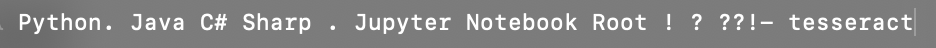

In [22]:
gray_text = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray_text)

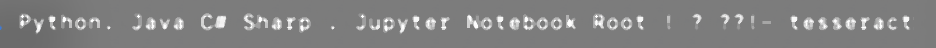

In [23]:
noise_image = cv2.medianBlur(image, 5)
Image.fromarray(noise_image)

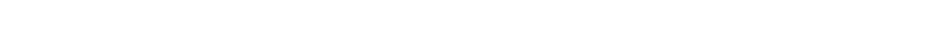

In [24]:
thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)[1]
Image.fromarray(thresh_image)

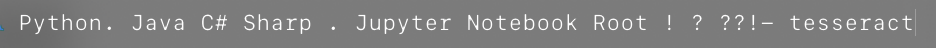

In [25]:
erode_image = cv2.erode(image, kernel=np.ones((2,2), np.uint8), iterations=1)
Image.fromarray(erode_image)

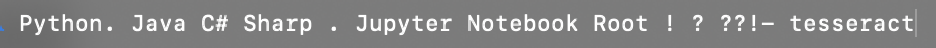

In [26]:
morph_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel=np.ones((2,2), np.uint8))
Image.fromarray(morph_image)

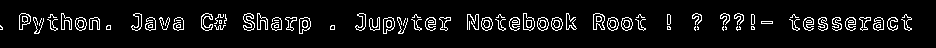

In [27]:
canny_image = cv2.Canny(image, 500, 500)
Image.fromarray(canny_image)

In [29]:
word = "Jupyter"
dic = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
print(dic["text"])

['', '', '', '', 'Python.', 'Java', 'C#', 'Sharp', '.', 'Jupyter', 'Notebook', 'Root', '!', '?', '??!-', 'tesseract']


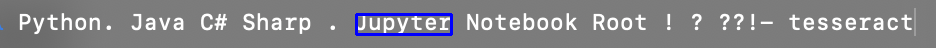

In [30]:
for i in range(len(dic["text"])):
    current_word = dic["text"][i]
    x = dic["left"][i]
    y = dic["top"][i]
    w = dic["width"][i]
    h = dic["height"][i]
    if re.match(word, current_word):
        image = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
Image.fromarray(image)